# Experiment 3: Hyper\-parameter tuning



In [3]:
# Importing and Prerocessing Data (same)
bank_data <- read.csv("bank-additional.csv", sep = ";")

bank_data$y <- as.factor(bank_data$y)
null_count <- sum(is.na(bank_data))
if (null_count > 0) {
  print("Null values found in the dataset.")
  print(colSums(is.na(bank_data)))
 
  bank_data <- na.omit(bank_data)
}
table(bank_data$y)

set.seed(123)
A <- sort(sample(nrow(bank_data), nrow(bank_data) * 0.8))
Train <- bank_data[A, ]
Val <- bank_data[-A, ]


   no   yes 
36548  4640 

In [4]:
# Adjust class weights for positive class
class_weights <- ifelse(Train$y == "yes", 2.5, 1)

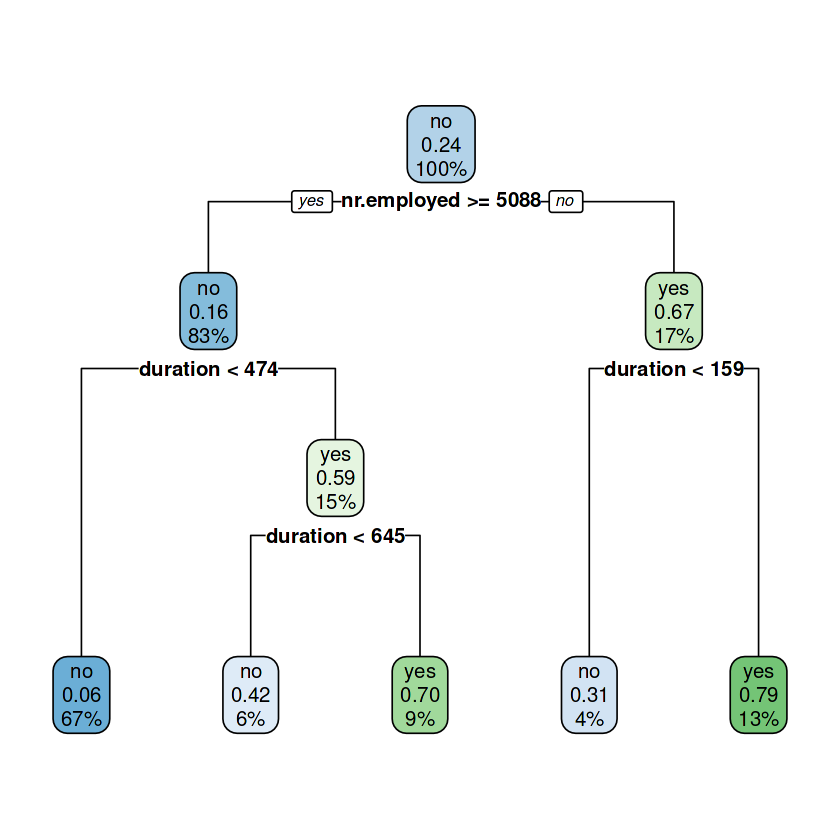

In [5]:
# Tuning Hyper Parameters  
library(rpart)
tree_model <- rpart(y ~ ., data = Train, method = "class", 
                    control = rpart.control(minsplit = 200, maxdepth = 5, cp = 0.02),
                    weights = class_weights)

library(rpart.plot)
rpart.plot(tree_model)

In [8]:
# Evaluating the model
predictions <- predict(tree_model, Val, type = "class")
library(caret)
confusionMatrix(predictions, Val$y)

Loading required package: ggplot2



Loading required package: lattice



Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  6850  240
       yes  513  635
                                          
               Accuracy : 0.9086          
                 95% CI : (0.9022, 0.9147)
    No Information Rate : 0.8938          
    P-Value [Acc > NIR] : 4.62e-06        
                                          
                  Kappa : 0.5768          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9303          
            Specificity : 0.7257          
         Pos Pred Value : 0.9661          
         Neg Pred Value : 0.5531          
             Prevalence : 0.8938          
         Detection Rate : 0.8315          
   Detection Prevalence : 0.8606          
      Balanced Accuracy : 0.8280          
                                          
       'Positive' Class : no              
                        

In [7]:
# Check feature importance
tree_model$variable.importance

duration    nr.employed      euribor3m   emp.var.rate  cons.conf.idx 
  3592.3557525   2871.4409172   2506.9353899   1583.6275262   1471.9711363 
cons.price.idx          month          pdays            age      education 
  1191.2166299    749.9695091      2.3787454      1.4753717      1.2081318 
       marital       previous 
     0.2543744      0.2034995